In [1]:
using Distributions, TimeIt, ProgressMeter, PyPlot, JLD
include("zz_structures.jl")

compute_ESS (generic function with 1 method)

### Without pre-conditioning:

In [2]:
ZZ_stra_weigh_xi_skel = 
load("/xtmp/PDMP_data/no_preconditioning/ZZ_stratified_weighted_noCV_skeleton.jld", 
     "skeleton")
ZZ_stra_weigh_bt_skel = 
load("/xtmp/PDMP_data/no_preconditioning/ZZ_stratified_weighted_noCV_bouncetimes.jld", 
     "bouncetimes")

discard = 0
n_samples = 10^3
xi_samples_stra_weigh = extract_samples(ZZ_stra_weigh_xi_skel[:,discard+1:end], 
                             ZZ_stra_weigh_bt_skel[:,discard+1:end], 
                             (ZZ_stra_weigh_bt_skel[end]-ZZ_stra_weigh_bt_skel[discard+1])/n_samples)

d_out = size(xi_samples_stra_weigh,1)
maxlag = 200
acfs_stra_weigh_no_precond = zeros(d_out, maxlag)
for dim in 1:d_out 
    acfs_stra_weigh_no_precond[dim,:] = acf(xi_samples_stra_weigh[dim,:], maxlag)
end

acfs_toplot_stra_weigh_no_precond = []
xt = []
for i in 1:Int(maxlag/10) 
    push!(acfs_toplot_stra_weigh_no_precond, acfs_stra_weigh_no_precond[:,i*10])
    if i%5 == 0 
        push!(xt, 10*i)
    else 
        push!(xt, "")
    end
end

In [3]:
ZZ_weigh_noCV_xi_skel = 
load("/xtmp/PDMP_data/no_preconditioning/ZZ_weighted_noCV_skeleton.jld", 
     "skeleton")
ZZ_weigh_noCV_bt_skel = 
load("/xtmp/PDMP_data/no_preconditioning/ZZ_weighted_noCV_bouncetimes.jld", 
     "bouncetimes")

discard = 0
n_samples = 10^3
xi_samples_weigh_noCV = extract_samples(ZZ_weigh_noCV_xi_skel[:,discard+1:end], 
                             ZZ_weigh_noCV_bt_skel[:,discard+1:end], 
                             (ZZ_weigh_noCV_bt_skel[end]-ZZ_weigh_noCV_bt_skel[discard+1])/n_samples)

d_out = size(xi_samples_weigh_noCV,1)
maxlag = 200
acfs_weigh_noCV_no_precond = zeros(d_out, maxlag)
for dim in 1:d_out 
    acfs_weigh_noCV_no_precond[dim,:] = acf(xi_samples_weigh_noCV[dim,:], maxlag)
end

acfs_toplot_weigh_noCV_no_precond = []
xt = []
for i in 1:Int(maxlag/10) 
    push!(acfs_toplot_weigh_noCV_no_precond, acfs_weigh_noCV_no_precond[:,i*10])
    if i%5 == 0 
        push!(xt, 10*i)
    else 
        push!(xt, "")
    end
end

In [4]:
ZZ_weigh_CV_xi_skel = 
load("/xtmp/PDMP_data/no_preconditioning/ZZ_weighted_CV_skeleton.jld", 
     "skeleton")
ZZ_weigh_CV_bt_skel = 
load("/xtmp/PDMP_data/no_preconditioning/ZZ_weighted_CV_bouncetimes.jld", 
     "bouncetimes")

discard = 0
n_samples = 10^3
xi_samples_weigh_CV = extract_samples(ZZ_weigh_CV_xi_skel[:,discard+1:end], 
                             ZZ_weigh_CV_bt_skel[:,discard+1:end], 
                            (ZZ_weigh_CV_bt_skel[end]-ZZ_weigh_CV_bt_skel[discard+1])/n_samples)

d_out = size(xi_samples_weigh_CV,1)
maxlag = 200
acfs_weigh_CV_no_precond = zeros(d_out, maxlag)
for dim in 1:d_out 
    acfs_weigh_CV_no_precond[dim,:] = acf(xi_samples_weigh_CV[dim,:], maxlag)
end

acfs_toplot_weigh_CV_no_precond = []
xt = []
for i in 1:Int(maxlag/10) 
    push!(acfs_toplot_weigh_CV_no_precond, acfs_weigh_CV_no_precond[:,i*10])
    if i%5 == 0 
        push!(xt, 10*i)
    else 
        push!(xt, "")
    end
end

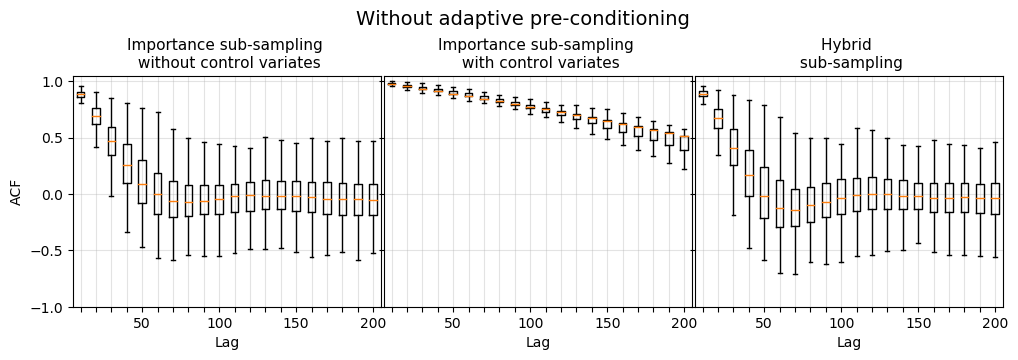

In [5]:
using PyPlot
fig = figure("pyplot_subplot_mixed", figsize=(12,3))

a, b = -1, 1.05
subplot(131)
boxplot(acfs_toplot_weigh_noCV_no_precond, showfliers=false)
grid(alpha=0.35)
xlabel("Lag", fontsize=10)
ylabel("ACF", fontsize=10)
xticks(1:20, xt)
ylim([a,b])
title("Importance sub-sampling \n without control variates", fontsize=11)

subplot(132)
boxplot(acfs_toplot_weigh_CV_no_precond, showfliers=false)
grid(alpha=0.35)
xlabel("Lag", fontsize=10)
xticks(1:20, xt)
yticks(alpha=0)
ylim([a,b])
title("Importance sub-sampling \n with control variates", fontsize=11)

subplot(133)
boxplot(acfs_toplot_stra_weigh_no_precond, showfliers=false)
grid(alpha=0.35)
xlabel("Lag", fontsize=10)
xticks(1:20, xt)
yticks(alpha=0)
ylim([a,b])
title("Hybrid \n sub-sampling", fontsize=11)
subplots_adjust(wspace=0.01)
suptitle("Without adaptive pre-conditioning", y=1.1, fontsize=14)
# savefig("plots/highdim_no_precond.pdf", format="pdf", dpi=10000, bbox_inches="tight");

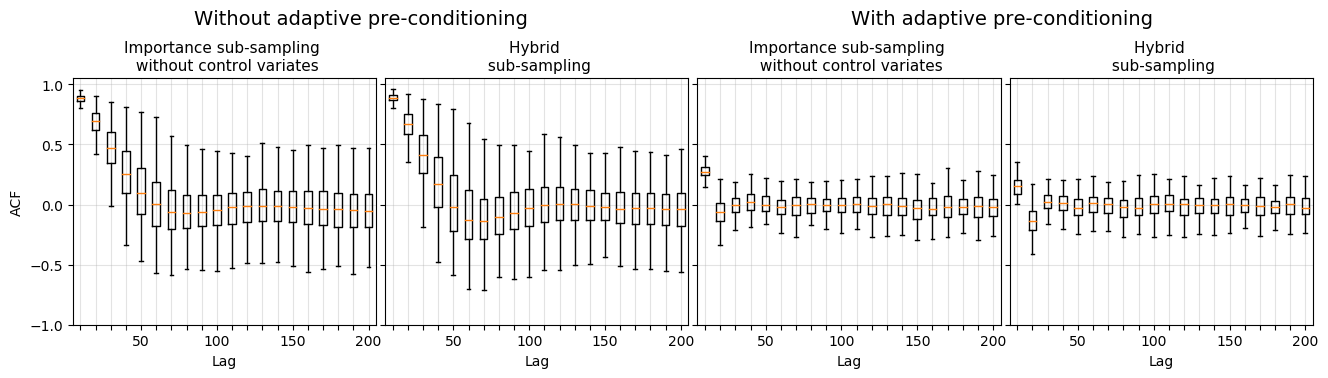

In [11]:
using PyPlot
fig = figure("pyplot_subplot_mixed", figsize=(16,3.2))

a, b = -1, 1.05
subplot(141)
boxplot(acfs_toplot_weigh_noCV_no_precond, showfliers=false)
grid(alpha=0.35)
xlabel("Lag", fontsize=10)
ylabel("ACF", fontsize=10)
xticks(1:20, xt)
ylim([a,b])
title("Importance sub-sampling \n without control variates", fontsize=11)

subplot(142)
boxplot(acfs_toplot_stra_weigh_no_precond, showfliers=false)
grid(alpha=0.35)
xlabel("Lag", fontsize=10)
xticks(1:20, xt)
yticks(alpha=0)
ylim([a,b])
title("Hybrid \n sub-sampling", fontsize=11)

subplot(143)
boxplot(acfs_toplot_weigh_noCV_precond, showfliers=false)
grid(alpha=0.35)
xlabel("Lag", fontsize=10)
xticks(1:20, xt)
yticks(alpha=0)
ylim([a,b])
title("Importance sub-sampling \n without control variates", fontsize=11)

subplot(144)
boxplot(acfs_toplot_stra_weigh_precond, showfliers=false)
grid(alpha=0.35)
xlabel("Lag", fontsize=10)
xticks(1:20, xt)
yticks(alpha=0)
ylim([a,b])
title("Hybrid \n sub-sampling", fontsize=11)
subplots_adjust(wspace=0.01)

subplots_adjust(wspace=0.03)
text(-53.3, 1.5, "Without adaptive pre-conditioning", fontsize=14)
text(-10, 1.5, "With adaptive pre-conditioning", fontsize=14)
# savefig("plots/highdim.pdf", format="pdf", dpi=10000, bbox_inches="tight");

### With pre-conditioning:

In [7]:
ZZ_stra_weigh_xi_skel = 
load("/xtmp/PDMP_data/preconditioning_byvar/ZZ_stratified_weighted_noCV_skeleton.jld", 
     "skeleton")
ZZ_stra_weigh_bt_skel = 
load("/xtmp/PDMP_data/preconditioning_byvar/ZZ_stratified_weighted_noCV_bouncetimes.jld", 
     "bouncetimes")

discard = 0
n_samples = 10^3
xi_samples_stra_weigh = extract_samples(ZZ_stra_weigh_xi_skel[:,discard+1:end], 
                             ZZ_stra_weigh_bt_skel[:,discard+1:end], 
                             (ZZ_stra_weigh_bt_skel[end]-ZZ_stra_weigh_bt_skel[discard+1])/n_samples)

d_out = size(xi_samples_stra_weigh,1)
maxlag = 200
acfs_stra_weigh_precond = zeros(d_out, maxlag)
for dim in 1:d_out 
    acfs_stra_weigh_precond[dim,:] = acf(xi_samples_stra_weigh[dim,:], maxlag)
end

acfs_toplot_stra_weigh_precond = []
xt = []
for i in 1:Int(maxlag/10) 
    push!(acfs_toplot_stra_weigh_precond, acfs_stra_weigh_precond[:,i*10])
    if i%5 == 0 
        push!(xt, 10*i)
    else 
        push!(xt, "")
    end
end

In [8]:
ZZ_weigh_noCV_xi_skel = 
load("/xtmp/PDMP_data/preconditioning_byvar/ZZ_weighted_noCV_skeleton.jld", 
     "skeleton")
ZZ_weigh_noCV_bt_skel = 
load("/xtmp/PDMP_data/preconditioning_byvar/ZZ_weighted_noCV_bouncetimes.jld", 
     "bouncetimes")

discard = 0
n_samples = 10^3
xi_samples_weigh_noCV = extract_samples(ZZ_weigh_noCV_xi_skel[:,discard+1:end], 
                             ZZ_weigh_noCV_bt_skel[:,discard+1:end], 
                             (ZZ_weigh_noCV_bt_skel[end]-ZZ_weigh_noCV_bt_skel[discard+1])/n_samples)

d_out = size(xi_samples_weigh_noCV,1)
maxlag = 200
acfs_weigh_noCV_precond = zeros(d_out, maxlag)
for dim in 1:d_out 
    acfs_weigh_noCV_precond[dim,:] = acf(xi_samples_weigh_noCV[dim,:], maxlag)
end

acfs_toplot_weigh_noCV_precond = []
xt = []
for i in 1:Int(maxlag/10) 
    push!(acfs_toplot_weigh_noCV_precond, acfs_weigh_noCV_precond[:,i*10])
    if i%5 == 0 
        push!(xt, 10*i)
    else 
        push!(xt, "")
    end
end

In [9]:
ZZ_weigh_CV_xi_skel = 
load("/xtmp/PDMP_data/preconditioning_byvar/ZZ_weighted_CV_skeleton.jld", 
     "skeleton")
ZZ_weigh_CV_bt_skel = 
load("/xtmp/PDMP_data/preconditioning_byvar/ZZ_weighted_CV_bouncetimes.jld", 
     "bouncetimes")

discard = 0
n_samples = 10^3
xi_samples_weigh_CV = extract_samples(ZZ_weigh_CV_xi_skel[:,discard+1:end], 
                             ZZ_weigh_CV_bt_skel[:,discard+1:end], 
                            (ZZ_weigh_CV_bt_skel[end]-ZZ_weigh_CV_bt_skel[discard+1])/n_samples)

d_out = size(xi_samples_weigh_CV,1)
maxlag = 200
acfs_weigh_CV_precond = zeros(d_out, maxlag)
for dim in 1:d_out 
    acfs_weigh_CV_precond[dim,:] = acf(xi_samples_weigh_CV[dim,:], maxlag)
end

acfs_toplot_weigh_CV_precond = []
xt = []
for i in 1:Int(maxlag/10) 
    push!(acfs_toplot_weigh_CV_precond, acfs_weigh_CV_precond[:,i*10])
    if i%5 == 0 
        push!(xt, 10*i)
    else 
        push!(xt, "")
    end
end

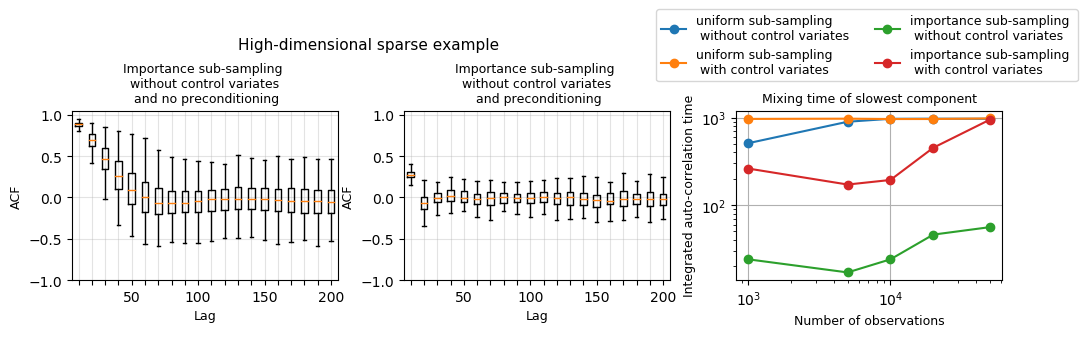

In [18]:
using PyPlot
fig = figure("pyplot_subplot_mixed", figsize=(12,2.2))

a, b = -1, 1.05

subplot(131)
boxplot(acfs_toplot_weigh_noCV_no_precond, showfliers=false)
grid(alpha=0.35)
xlabel("Lag", fontsize=9)
xticks(1:20, xt)
ylim([a,b])
ylabel("ACF", fontsize=9)
title("Importance sub-sampling \n without control variates \n and no preconditioning", fontsize=9)

subplot(132)
boxplot(acfs_toplot_weigh_noCV_precond, showfliers=false)
grid(alpha=0.35)
xlabel("Lag", fontsize=9)
xticks(1:20, xt)
ylim([a,b])
ylabel("ACF", fontsize=9)
# yticks(alpha=0)
title("Importance sub-sampling \n without control variates \n and preconditioning", fontsize=9)
text(-12, 1.8, "High-dimensional sparse example", fontsize=11)

subplot(133)
Nobs_list = [1000, 5000, 10_000, 20_000, 50_000] 
a = zeros(6,5)
a[1,:] = [511, 899, 971, 974, 971]
a[2,:] = [968, 974, 965, 966, 981] 
a[3,:] = [24, 17, 24, 46, 56]
a[4,:] = [262, 172, 194, 453, 949];
labels = ["uniform sub-sampling \n without control variates",
            "uniform sub-sampling \n with control variates",
            "importance sub-sampling \n without control variates",
            "importance sub-sampling \n with control variates"]
for i in 1:4
    plot(Nobs_list, a[i,:], "o-", label=labels[i])
end
yscale("log")
xscale("log")
grid(true)
legend(bbox_to_anchor=(-0.3, 1.6), loc=2, borderaxespad=0.0, ncol=2, fontsize=9)
xlabel("Number of observations", fontsize=9)
ylabel("Integrated auto-correlation time", fontsize=9)
title("Mixing time of slowest component", fontsize=9);
subplots_adjust(wspace=0.25)

# savefig("plots/highdim+scaling.pdf", format="pdf", dpi=10000, bbox_inches="tight")